# Tutorial 03 - Filters
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/schedldave/cv2021/blob/main/03_Filters.ipynb)
## Dr. David C. Schedl

Note: this tutorial is geared towards students **experienced in general programming** and aims to introduce you to Computer Vision techniques.


Useful links:
* OpenCV Tutorials: https://docs.opencv.org/master/d9/df8/tutorial_root.html
* Image Processing in Pyhton: https://github.com/xn2333/OpenCV/blob/master/Seminar_Image_Processing_in_Python.ipynb



# Contents

** ToDo **

Table of Contents  
- [Filters in OpenCV](#Filters)
    - Reading images
    - Channel and Image Formats
    - Showing images
    - Color channels
    - Manipulating images
    - Writing images
    - ...
- [Fourier Transformation](#Fourier_Transformation)

# Initilization

As always let's import useful libraries, first.

In [1]:
import os
import cv2 # openCV
import numpy as np
import matplotlib.pyplot as plt

We will work with images today. So let's download some with `curl` (the same sources as in `02_OpenCV.ipynb`).

In [2]:
!curl -o "cat.jpg" "https://placekitten.com/500/300"

!curl -o "gogh.jpg" "https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Vincent_van_Gogh_-_National_Gallery_of_Art.JPG/367px-Vincent_van_Gogh_-_National_Gallery_of_Art.JPG"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 14567    0 14567    0     0  84202      0 --:--:-- --:--:-- --:--:-- 84202
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 84904  100 84904    0     0   222k      0 --:--:-- --:--:-- --:--:--  221k


Let's define functions to display images. In Jupyter Notebooks OpenCV's `imshow` does not work and matplotlib's `imshow` needs special treatment due to color channel handling (RGB vs. BGR)

In [3]:
if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab.patches import cv2_imshow
else:
  print('Not running on CoLab')
  def cv2_imshow(img):
      """A replacement for cv2.imshow() for use in Jupyter notebooks.

        Args:
          img : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color
            image.
      """
      cv2.imshow('image', img)
      cv2.waitKey(0)
      cv2.destroyAllWindows()

def imshow(image, *args, **kwargs):
    """A replacement for cv2.imshow() for use in Jupyter notebooks using matplotlib.

        Args:
          image : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. 
    """
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion  
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    plt.show()

Running on CoLab


In [ ]:
cv2_imshow()

# OpenCV

OpenCV is an extremely popular computer vision library built in C++, with many powerful tools for CV. It lets you read, write, and show images and videos, read from webcam streams, find matching keypoints between two images, and more.

OpenCV is written in C++, however, there is a Python library that uses these optimized C++ libraries, and exposes an API using numpy arrays!

Let's import OpenCV

In [ ]:
import cv2

## Reading images

You can use the `imread` function to read in an image from a filepath.

In [ ]:
image = cv2.imread("gogh.jpg")

Images in OpenCV are represented as numpy arrays!

In [ ]:
type(image), image.shape, image.dtype

(numpy.ndarray, (480, 367, 3), dtype('uint8'))

## Channels and image formats
The shape of a color image is (height, width, colors BGR) \
While it may seem strange that the height is first, it's because OpenCV treats images as "Rows" and "Columns" of an image. The "height" of an image is the number of rows!

Color images consist of "channels" - each color we can render is some combination of red, green, and blue (OR, in the case of a grayscale image, gray).

In [ ]:
image.shape

(480, 367, 3)

You can see each pixel is represented by 3 values (uint8 means they are between 0 and 255)

In [ ]:
image[0,0] # Get the pixel located at (0,0) from the top left

array([60, 58, 48], dtype=uint8)

## Showing the image 

If you're running scripted Python (not Jupyter notebook) The `imshow` command will display an image. However, this cause problems in jupyter notebooks (see [this issue](https://github.com/jupyter/notebook/issues/3935)). 

In Colab, you can can use the following function as replacement: 
`from google.colab.patches import cv2_imshow`

On my machine, however, I can also display images with imshow (code below). It will halt the execution until you close the image window again.

Running on CoLab


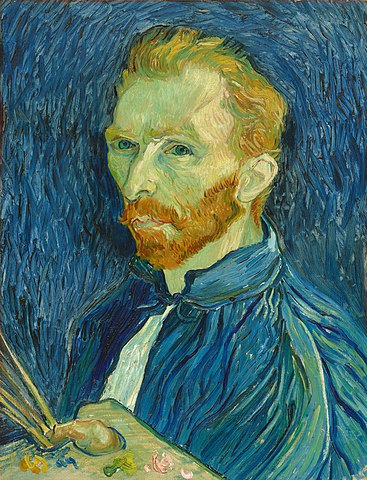

In [ ]:
# This line only works if you're running locally
# cv2.imshow('test', image)

if 'google.colab' in str(get_ipython()):
  print('Running on CoLab')
  from google.colab.patches import cv2_imshow
else:
  print('Not running on CoLab')
  def cv2_imshow(img):
      cv2.imshow('image', img)
      cv2.waitKey(0)
      cv2.destroyAllWindows()


cv2_imshow(image)

## Color channels

Let's seperate the color channels and display them:

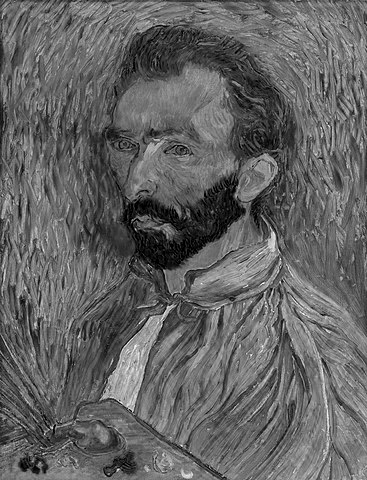

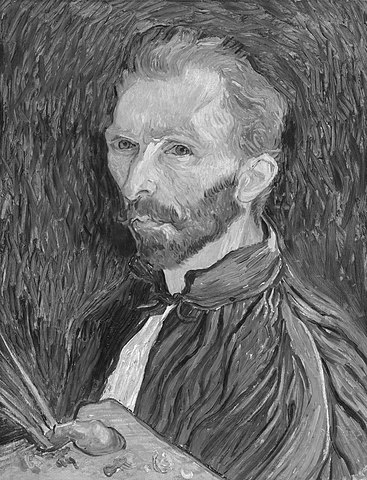

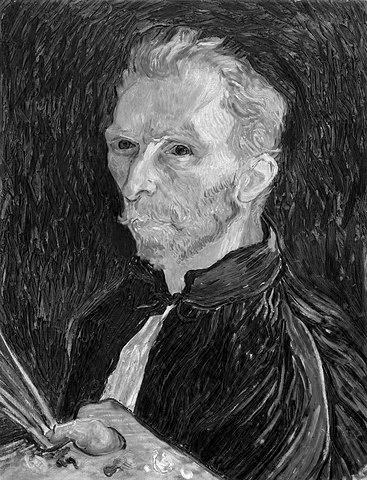

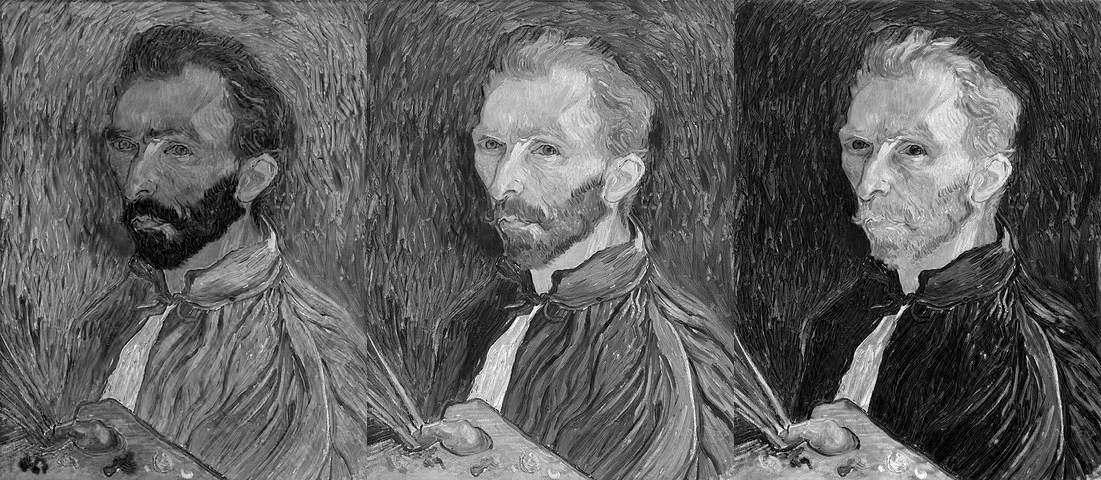

In [ ]:
c1, c2, c3 = image[:,:,0], image[:,:,1], image[:,:,2]

# let's display them
cv2_imshow(c1)
cv2_imshow(c2)
cv2_imshow(c3)

# or in a row by concatinating them
cv2_imshow( np.concatenate((c1,c2,c3), axis=1) )

## Manipulating images



### Changing individual channels


We also can manipulate it by doing anything we would to a normal array. Let's make an image that includes the *green* channel as the *blue* channel and *red* channels, and nothing in the green channels.

Created image of shape (480, 367, 3)


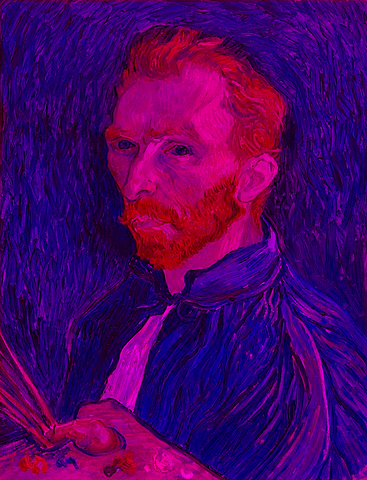

In [ ]:
empty_arr = np.zeros(c2.shape, dtype=np.uint8)

# Stack them, making the 3rd axis
manipulated_image = np.stack([ c1, empty_arr, c3, ], axis=2)
print("Created image of shape",manipulated_image.shape)
cv2_imshow(manipulated_image)

## Writing an Image

The `imwrite` function can write out an image. Let's write out the image we just made, so we can use it later!

In [ ]:
output_path = os.path.join("output.png")
cv2.imwrite(output_path, manipulated_image)

True

We should be able to read that image directly from the file. Let's try!

Read file of shape: (480, 367, 3) type uint8


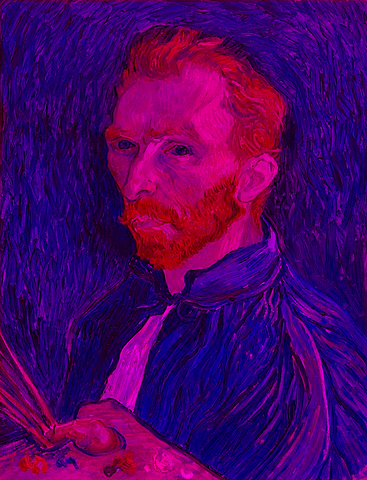

In [ ]:
test_read_output = cv2.imread(output_path)
print("Read file of shape:",test_read_output.shape, "type",test_read_output.dtype)
cv2_imshow(test_read_output)

Everything works as expected!

## Display with Matplotlib

Additionally we can plot an image also with matplotlib. This is very useful if you want to draw on top of images. OpenCV provides basic functions, but Matplotlib is much better (e.g., dashed lines are not possible with OpenCV).

Since images are numpy array this should be easy, right?

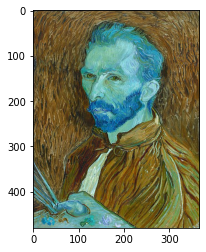

In [ ]:
plt.imshow(image)
plt.show()


**Colors are not right! What is happening?**

By default, color images are opened by OpenCV as BGR, meaning the values for a given pixel are ordered "blue, green, red".

We can use the `cv2.cvtColor` function to change which color system our image is in.

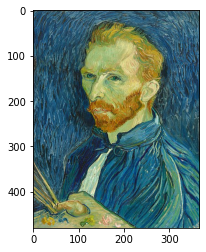

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

Matplotlib assumes images are in the **RGB** format. OpenCV assumes that images are in the **BGR** format. So, we'll convert colors before showing the image. Here is a function to show OpenCV images with matplotlib.

In [ ]:
def imshow(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion  
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    plt.show()

## Try it yourself!

You should now be able to do Exercise 1 and 2.

# Examples from slides

## Bayer Filter

Image sensors have a Bayer filter on the sensor elements (pixels). So every 2nd pixel in even rows is red, every 2nd pixel in odd rows is blue, and every 2nd pixel in all rows contains green:

|     |  0  |  1  |
|---  | --- | --- | 
|**0**| R   | G   | 
|**1**| G   | B   |

Let's create a `raw` image with such a Bayer pattern from our loaded images. We can use masking and slicing.

(480, 367, 3)


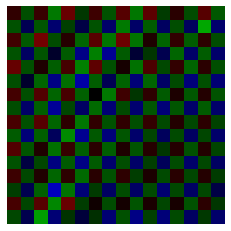

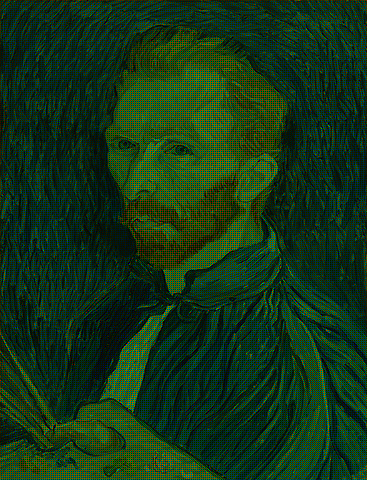

In [ ]:
# 
print(image.shape)
red_mask = np.zeros(shape=image.shape[0:2],dtype=np.bool)
green_mask, blue_mask = red_mask.copy(), red_mask.copy()
red_mask[0::2,0::2] = True
blue_mask[1::2,1::2] = True
green_mask[0::2,1::2] = True
green_mask[1::2,0::2] = True

# display red
rsize = np.ceil(np.asarray(red_mask.shape)/2.0).astype(int)
reds = image[:,:,2][red_mask].reshape(rsize)
#cv2_imshow(reds)

# display blue
bsize = np.floor(np.asarray(blue_mask.shape)/2.0).astype(int)
blues = image[:,:,0][blue_mask].reshape(bsize)
#cv2_imshow(blues)

# construct a Bayer image:
bayer = np.zeros(shape=(*image.shape[0:2],3),dtype=image.dtype)
# assing colors (BGR)
bayer[:,:,0][blue_mask]  = blues.flatten() # B
bayer[:,:,2][red_mask]   = reds.flatten() # R
bayer[:,:,1][green_mask] = image[:,:,1][green_mask] # Green
imshow(bayer[:16,:16]) # show zoomed in
cv2_imshow(bayer)

The pattern above shows, what most color image sensors record. The process of converting such a Bayer pattern into a color image is called demosaicing. 

## Naive image resizing 
… by simply throwing away rows and columns (see lecture slides).
We can use Python's slicing notation do to so.

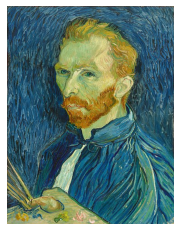

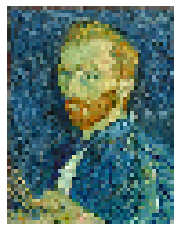

In [ ]:
def downsample( img ):
    return img[0::2,0::2]

half = downsample(image)    # 1/2 resolution
quad = downsample(half)     # 1/4
eighth = downsample(quad)   # 1/8
imshow(image)
#imshow(half)
#imshow(quad)
imshow(eighth)

Dropping pixels is not a good way to downscale images. It leads to severe aliasing problems (see lecture slides). 

Let's look compare to a downsampled image by OpenCV's built-in `resize` function.

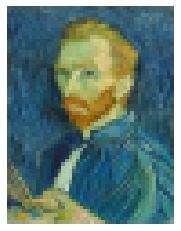

In [ ]:
smooth = cv2.resize(image, eighth.shape[1::-1], interpolation=cv2.INTER_AREA)
imshow(smooth)

This looks nicer and does not show any aliasing artefacts. We will discuss the details in the upcoming lectures!

# OpenCV Exercises

## Exercise 1

**Grayscale:** Color is nice, but monochrome images are also very appealing.
Displaying a single color channel does not really look nice. So we need a weighted sum of all channels.
Typical weights to convert from RGB to grayscale are: 
> $0.2989 * R + 0.5870 * G + 0.1140 * B$

**(a)** Load the image `gogh.jpg`. Convert it to grayscale and display it. Don't forget that channels are BGR.



In [ ]:
# Solution (a)


## Exercise 2

**Gamma Curve:** 8-bit images are stored non-linear (like our perception). \
A common function used for this non-linear linear mapping is the gamma curve: $ y = x^\gamma $, where $x$ are the linear values in the range \[0,1\]. Gamma is $\gamma=2.2$ on most systems.

**(a)** Linearize the image and display it. Note that displaying a linear image might look weird. \
**(b)** Apply different $\gamma$ (i.e., 0.5, 1.0, and 1.5) and see whats happening.

In [ ]:
# Solution (a)


In [ ]:
# Solution (b)
